<a href="https://colab.research.google.com/github/Seongjin1225/AI_SCHOOL_9/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D/10%EC%9B%94%2031%EC%9D%BC/10%EC%9B%94_31%EC%9D%BC_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 참고?
import seaborn as sns

titanic = sns.load_dataset('titanic')
df = titanic.loc[:,['age','fare']]
df['ten'] = 10
df.head()

# 사용자 함수 정의
def add_10(n):
    return n + 10

def add_two_obj(a,b):
    return a + b

# 시리즈 객체에 적용
sr1 = df['age'].apply(add_10)   # apply -> 함수를 매핑해주는 역할 / n = df['age']의 모든 원소
sr1.head()

# 시리즈 객체와 숫자에 적용 : 2개의 인수(시리즈 + 숫자)
sr2 = df['age'].apply(add_two_obj, b=10)  # a = df['age']의 모든 원소, b=10
sr2.head()

# 람다 함수 활용: 시리즈 객체에 적용
sr3 = df['age'].apply(lambda x: add_10(x))  # x=df['age']
print(sr3.head())

In [ ]:
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')
print(df.head())
print(df.info())

# deck 열의 NaN 개수 계산하기
#nan_deck = df['deck'].value_counts(dropna=False) # NaN을 포함시켜 출력함
nan_deck = df['deck'].value_counts()  # NaN을 제외하고 출력
print(nan_deck)

# isnull() 메서드로 누락 데이터 찾기
print(df.head().isnull())

# notnull() 메서드로 누락 데이터 찾기
print(df.head().notnull())

# isnull() 메서드로 누락 데이터 개수 구하기
print(df.head().isnull().sum(axis=0))

In [ ]:
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')

# for 반복문으로 각 열의 NaN 개수 계산하기
missing_df = df.isnull()
for col in missing_df.columns:
    missing_count = missing_df[col].value_counts()    # 각 열의 NaN 개수 파악

    try:
        print(col, ': ', missing_count[True])   # NaN 값이 있으면 개수를 출력
    except:
        print(col, ': ', 0)                     # NaN 값이 없으면 0개 출력

# NaN 값이 500개 이상인 열을 모두 삭제 - deck 열(891개 중 688개의 NaN 값)
df_thresh = df.dropna(axis=1, thresh=500)
print(df_thresh.columns)

# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
df_age = df.dropna(subset=['age'], how='any', axis=0)  # how='any' --> 모든 데이터 중 ~ 가 하나라도 있는 경 / how='all' --> 모든 데이터가 ~ 인 경
print(len(df_age))

In [ ]:
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')

# embark_town 열의 829행의 NaN 데이터 출력
print(df['embark_town'][825:830])
print('\n')

# embark_town 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = df['embark_town'].value_counts(dropna=True).idxmax()
print(most_freq)
print('\n')

df['embark_town'].fillna(most_freq, inplace=True)

# embark_town 열 829행의 NaN 데이터 출력 (NaN 값이 most_freq 값으로 대체)
print(df['embark_town'][825:830])

In [ ]:
# 오전 진도
import pandas as pd

data = pd.DataFrame({'A':['1','2','3']})

In [ ]:
import pandas as pd

data = pd.DataFrame({'A':[1,2,3,None], 'B':[4, None, 6,7], 'C':[None,8,9,10]})

# 결측값이 있는 행 제거한 데이터 프레임
data_dropna = data.dropna()

# 결과 출력
data_dropna

,A,B,C
2,3.0,6.0,9.0


In [ ]:
import pandas as pd

data = pd.DataFrame({'A':[1,2,3,None], 'B':[4, None, 6,7], 'C':[None,8,9,10]})

# 결측값을 0으로 채운 데이터 프레임
data_fillna = data.fillna(0)

# 결과 출력
data_fillna

,A,B,C
0,1.0,4.0,0.0
1,2.0,0.0,8.0
2,3.0,6.0,9.0
3,0.0,7.0,10.0


In [ ]:
import pandas as pd

data = pd.DataFrame({'A':[1,2,3,None], 'B':[4, None, 6,7], 'C':[None,8,9,10]})

# 결측값을 평균으로 채운 데이터 프레임
avg = data.mean()
data_fillna = data.fillna(avg,inplace=True)
data.fillna(data.mean())

# 결과 출력
data_fillna

None


In [ ]:
import pandas as pd

data = pd.DataFrame({'A':[1,2,3,None], 'B':[4, None, 6,7], 'C':[None,8,9,10]})

# 결측값을 해당 열의 최빈값으로 채운 데이터 프레임
data_fillna = data.fillna(data.mode().iloc[0])

# 결과 출력
data_fillna

,A,B,C
0,1.0,4.0,8.0
1,2.0,4.0,8.0
2,3.0,6.0,9.0
3,1.0,7.0,10.0


In [ ]:
import pandas as pd

data = pd.DataFrame({'A':[1,2,3,None], 'B':[4, None, 6,7]}, 'C':[None,8,9,10])

# 결측값을= 최빈값으로 채운 데이터 프레임
data_fillna = data.fillna(data.mode())

# 결과 출력
data_fillna

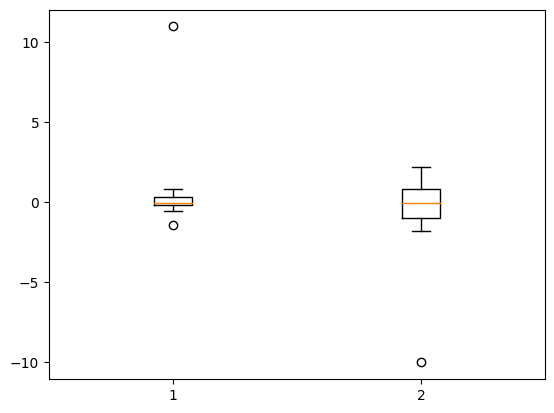

In [ ]:
# 이상치 관련
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 예시 데이터프레임 생성
df = pd.DataFrame(np.random.randn(8,3),columns=['C1','C2','C3'])
df.loc[1,'C1'] = 11
df.loc[3,'C3']=-10

# 박스플롯으로 시각화
plt.boxplot([df['C1'],df['C3']])
plt.show()

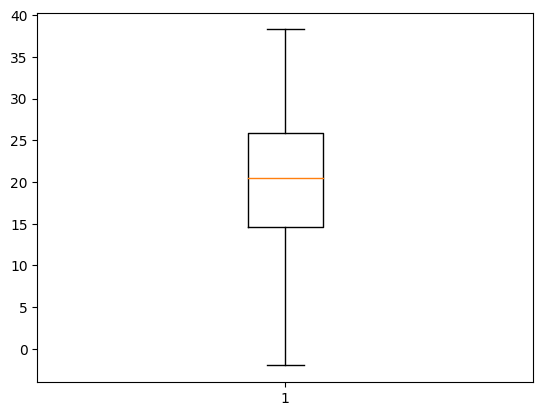

,dt,AverageTemperature,City,Latitude,Longitude,Year,Month,Day
0,1849-01-01,26.704,Abidjan,5.63N,3.23W,1849,1,1
1,1849-02-01,27.434,Abidjan,5.63N,3.23W,1849,2,1
2,1849-03-01,28.101,Abidjan,5.63N,3.23W,1849,3,1
3,1849-04-01,26.140,Abidjan,5.63N,3.23W,1849,4,1
4,1849-05-01,25.427,Abidjan,5.63N,3.23W,1849,5,1


In [ ]:
# 오후 진도 부분
# 전처리 실습(city.csv)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data 불러오기
city = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/데이터 분석/city.csv')

# dt 컬럼의 데이터타입을 datetime으로 변경
city['dt'] = pd.to_datetime(city['dt'])

# City, Country 컬럼의 결측값을 해당 컬럼의 최빈값으로 대체하세요
city.columns
city[['City']] = city[['City']].fillna(city.mode().iloc[0])
city.isnull().sum()

# AverageTemperature 컬럼의 결측값을 해당 컬럼의 평균값으로 대체
city['AverageTemperature'] = city['AverageTemperature'].fillna(city['AverageTemperature'].mean())

# AverageTemperature 컬럼에서 boxplot 사용하여 이상치 제거
# plt.boxplot(city['AverageTemperature'])
city = city[city.AverageTemperature>=-2]
plt.boxplot(x=city.AverageTemperature)
plt.show()

# year, month, day 컬럼 추가
city['Year'] = city['dt'].dt.year
city['Month'] = city['dt'].dt.month
city['Day'] = city['dt'].dt.day
city.head()

<ipython-input-16-aed9a4fff00a>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_data = want.corr()


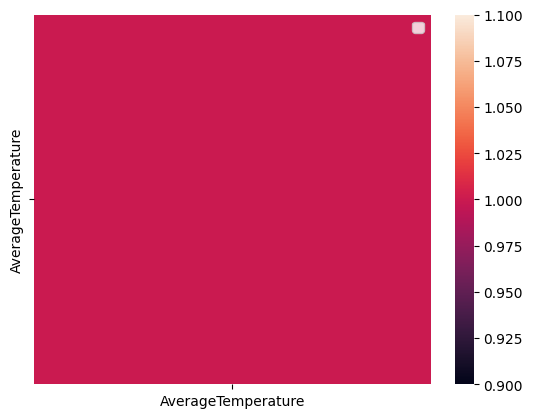

In [ ]:
# 위에서 전처리 한 데이터를 가지고 분석탐색해서 시각화 하여 나타내보기  - 4~6시 타임에서 하기
# 위도(Latitude)와 평균 기온(AverageTemperature) 간의 상관관계 하면 될듯
want = city[['Latitude','AverageTemperature']]
# want['Latitude'].hist(alpha=0.7,label='Latitude')
# want['AverageTemperature'].hist(alpha=0.3,label='AverageTemperature')
corr_data = want.corr()
sns.heatmap(corr_data)
plt.legend()
plt.show()

<Axes: >

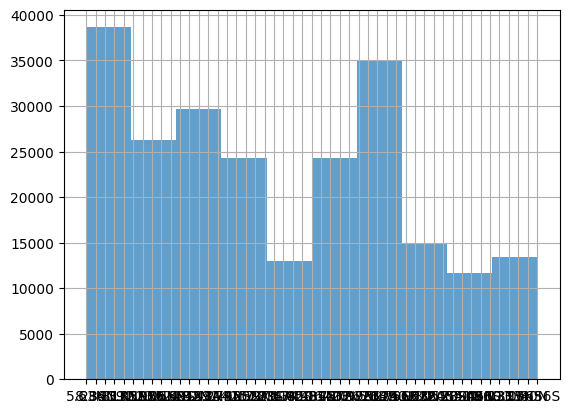

In [ ]:
want['Latitude'].hist(alpha=0.7,label='Latitude')

In [ ]:
want = city[['Latitude','AverageTemperature']]
print(want)

       Latitude  AverageTemperature
0         5.63N           26.704000
1         5.63N           27.434000
2         5.63N           28.101000
3         5.63N           26.140000
4         5.63N           25.427000
...         ...                 ...
239172   34.56N           18.979000
239173   34.56N           23.522000
239174   34.56N           25.251000
239175   34.56N           24.528000
239176   34.56N           18.125969

[231343 rows x 2 columns]
